# How far is China ahead of India ?
- It is well known that China and India are [re-emerging][1] as top economies in the world, but China is much ahead of India by most measures.
- So how long would it take for India to catch up with China?

Here we explore some key world development indicators to answer the question.

  [1]: http://www.economist.com/node/16834943

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.style.use('ggplot')

### Choosing Key Indicators
- Key topics for comparison are chosen using the [method discussed earlier][1] and then key indicators are hand-picked from those topics.

  [1]: https://www.kaggle.com/kmravikumar/d/worldbank/world-development-indicators/choosing-topics-to-explore

In [2]:
# read in file as data frame
df = pd.read_csv('../input/Indicators.csv')

# Create list of unique indicators, indicator codes
Indicator_array =  df[['IndicatorName','IndicatorCode']].drop_duplicates().values


In [3]:
modified_indicators = []
unique_indicator_codes = []
for ele in Indicator_array:
    indicator = ele[0]
    indicator_code = ele[1].strip()
    if indicator_code not in unique_indicator_codes:
        # delete , ( ) from the IndicatorNames
        new_indicator = re.sub('[,()]',"",indicator).lower()
        # replace - with "to" and make all words into lower case
        new_indicator = re.sub('-'," to ",new_indicator).lower()
        modified_indicators.append([new_indicator,indicator_code])
        unique_indicator_codes.append(indicator_code)

Indicators = pd.DataFrame(modified_indicators,columns=['IndicatorName','IndicatorCode'])
Indicators = Indicators.drop_duplicates()
print(Indicators.shape)

(1344, 2)


In [4]:

key_word_dict = {}
key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Food'] = ['food','grain','nutrition','calories']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['income','gdp','gni','deficit','budget','market','stock','bond','infrastructure']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment']
key_word_dict['Rural'] = ['rural','village']
key_word_dict['Urban'] = ['urban','city']

In [5]:
feature = 'Education'
for indicator_ele in Indicators.values:
    for ele in key_word_dict[feature]:
        word_list = indicator_ele[0].split()
        if ele in word_list or ele+'s' in word_list:
            # Uncomment this line to print the indicators explicitely
            #print(indicator_ele)
            break

#### Important Features 

In [6]:
# Main indicators to compare contries
chosen_indicators = ['NE.TRD.GNFS.ZS',  \
                     'SI.POV.2DAY', 'SE.SEC.ENRL', 'SE.ADT.1524.LT.ZS', \
                     'SI.DST.10TH.10', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', \
                     'NY.GDP.PCAP.PP.KD','SP.URB.TOTL.IN.ZS', 'SH.DTH.IMRT', \
                     'NE.EXP.GNFS.KD', 'NE.IMP.GNFS.KD' ]

# Subset of data with the required features alone
df_subset = df[df['IndicatorCode'].isin(chosen_indicators)]

# Chose only India and China for Analysis
df_India = df_subset[df['CountryName']=="India"]
df_China = df_subset[df['CountryName']=="China"]

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [7]:
# PLotting function for comparing development indicators
def plot_indicator(indicator,delta=10):
    ds_India = df_India[['IndicatorName','Year','Value']][df_India['IndicatorCode']==indicator]
    try:
        title = ds_India['IndicatorName'].iloc[0]
    except:
        title = "None"

    xindia = ds_India['Year'].values
    yindia = ds_India['Value'].values
    ds_China = df_China[['IndicatorName','Year','Value']][df_China['IndicatorCode']==indicator]
    xchina = ds_China['Year'].values
    ychina = ds_China['Value'].values
    
    plt.figure(figsize=(14,4))
    
    plt.subplot(121)
    plt.plot(xindia,yindia,label='India')
    plt.plot(xchina,ychina,label='China')
    plt.title(title)
    plt.legend(loc=2)

    plt.subplot(122)
    plt.plot(xindia,yindia,label='India')
    plt.plot(xchina+delta,ychina,label='China')
    plt.title(title + "\n Chinese Data Shifted by " +str(delta)+" Years")
    plt.legend(loc=2)

# KEY FEATURES
Now let us explore the key features one-by-one.

## 1) Trade as a percentage of GDP
- Note that by shifting the Chinese data by 10 years to the right it aligns well with the Indian data suggesting that India lags behind China by at least 10 years in terms of trade.

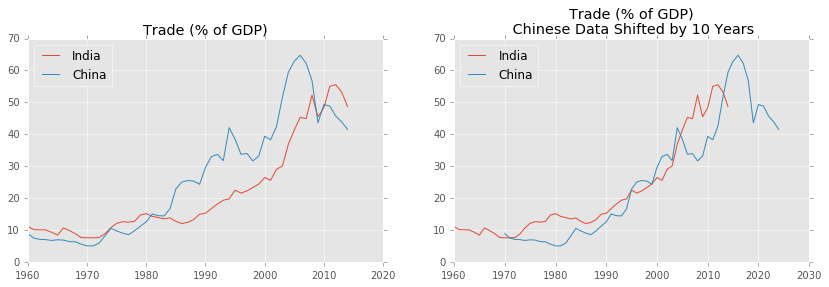

In [8]:
plot_indicator(chosen_indicators[0],delta=10)

## 2) Import and Export of goods and services
More specifically, we can look at total exports and imports.
- India lags behind China by 10 years 

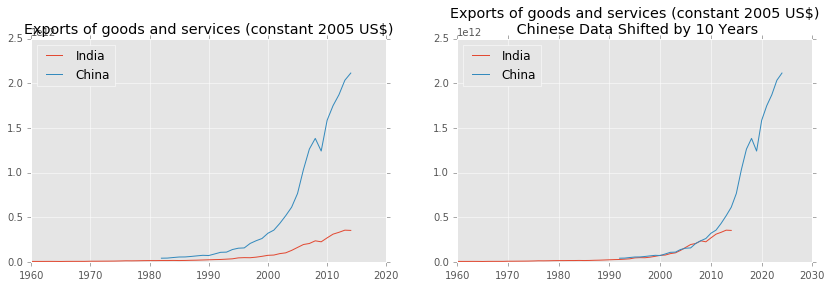

In [9]:
plot_indicator(chosen_indicators[10],delta=10)

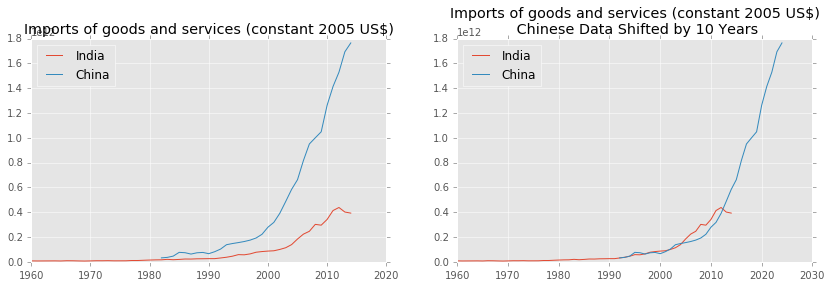

In [10]:
plot_indicator(chosen_indicators[11],delta=10)

## 3) GDP per capita (adjusted by purchasing power parity)
- Here also India lags behind China by ~9 years.

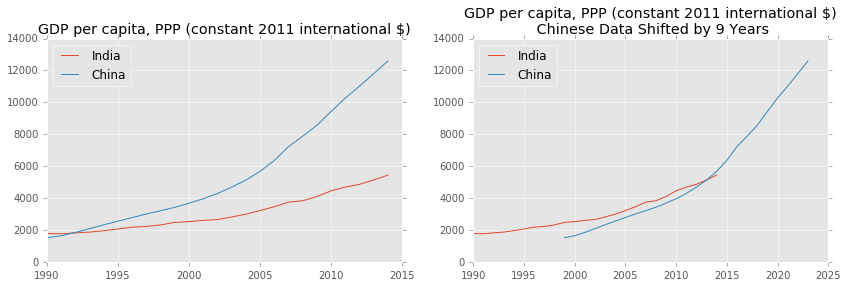

In [11]:
plot_indicator(chosen_indicators[7],delta=9)

## 4) Poverty Alleviation 
- China has managed to get a much steeper drop in poverty compared to India.
- It still appears that China has a head start of 10 years ahead of India.

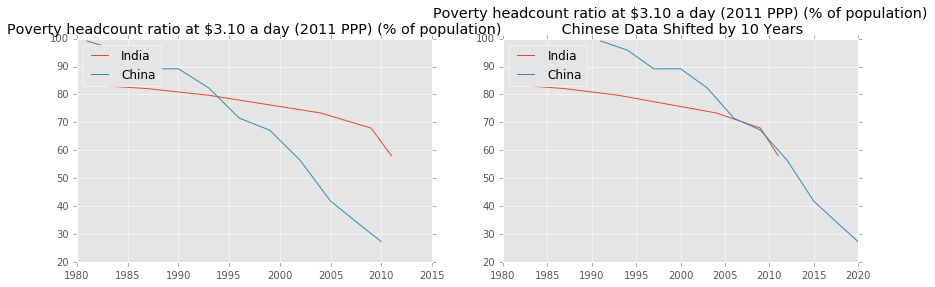

In [12]:
plot_indicator(chosen_indicators[1],delta=10)

## 5) Life Expectancy
- There was steep rise in life expectancy in China during the 1960's.
- Both countries have shown a significant increase over a past 5 decades.
- In terms of life expectancy, China leads India by ~ 25 years


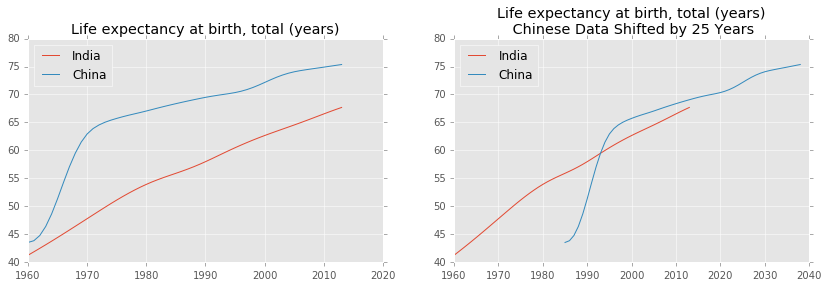

In [13]:
plot_indicator(chosen_indicators[6],delta=25)

## 6) Urban Population growth
- China leads India by ~ 15 years


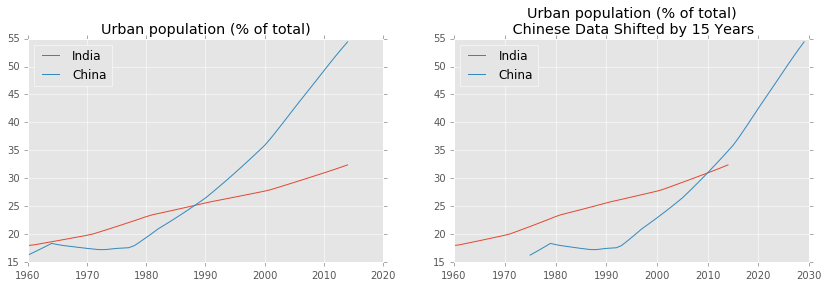

In [14]:
plot_indicator(chosen_indicators[8],delta=15)

## 6) Infant Mortality - as a measure of health care
- Both countries show a significant decrease in infant mortality.
- Surprisingly, there has been an increase in Chinese infant mortality rate during the 1980's - Might be something interesting to explore here!
- China leads India by ~ 20 years in infant mortality rate.


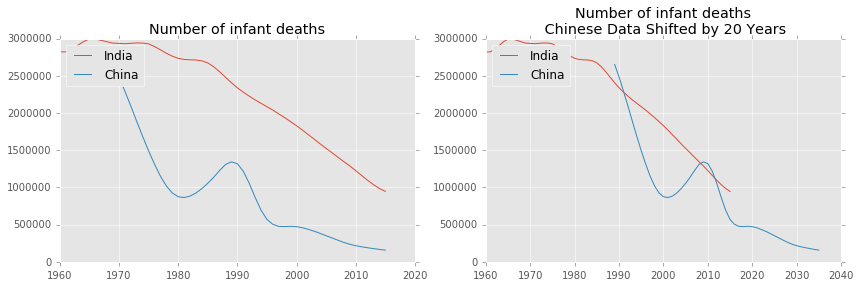

In [15]:
plot_indicator(chosen_indicators[9],delta=20)

## 7) Adult Literacy Rate
- Although the rate of increase seems to be the same for both countries, China has always had a 25 year advantage over India.

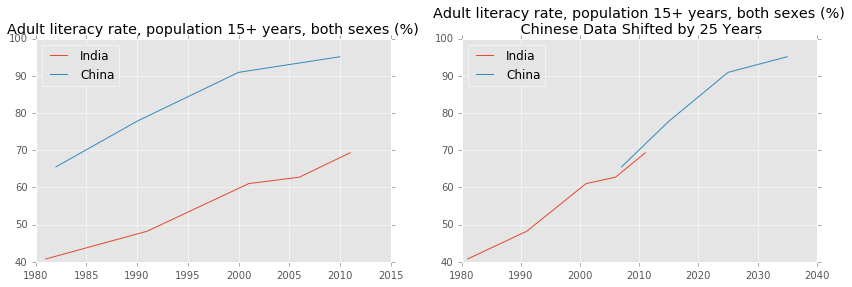

In [16]:
plot_indicator(chosen_indicators[5],delta=25)

## 8) Finally, how are the rich 10% doing in each country?
- This may not be the best economic measure, but gives some insights
- China has managed to create a lot more rich people faster, but due to the recent recessions India seems to have caught up with China.

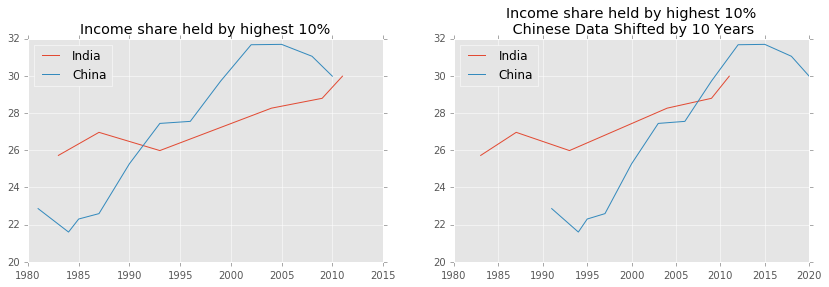

In [17]:
plot_indicator(chosen_indicators[4],delta=10)

# CONCLUSION
- By most economic measures like GDP, trade, and poverty alleviation China seems to be ahead of India by 10 years. 
- It is interesting to note that China undertook economic reforms in 1978 and India in 1990, exactly 12 years apart, suggesting that this might be the most significant reason for India to lag behind China by around 10 years in many economic growth measures.
- Even though the political model adopted in China and India are not the same, the growth rates and trend in most indicators are similar for both countries. This prompts us to ask the question does politics even matter ? 
- By some measures of education (literacy) and health care (infant mortality rate), India lags behind China by 20 - 25 years.

